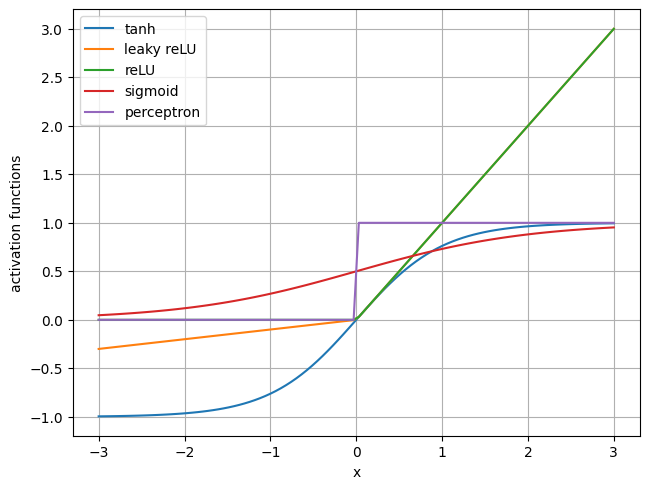

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

line = np.linspace(-3, 3, 100)
perceptron = np.zeros(len(line))
for idx, integer in enumerate(line):
    if integer <= 0:
        perceptron[idx] = 0
    else: 
        perceptron[idx] = 1
    
plt.plot(line, np.tanh(line),label="tanh")
plt.plot(line, np.maximum(.1*line, line), label="leaky reLU")
plt.plot(line, np.maximum(0, line), label="reLU")
plt.plot(line, 1/(1+np.exp(-line)), label='sigmoid')
plt.plot(line, perceptron, label='perceptron')
plt.grid()
plt.tight_layout()
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('activation functions')
plt.show()

Shape of X_forge: (26, 2)


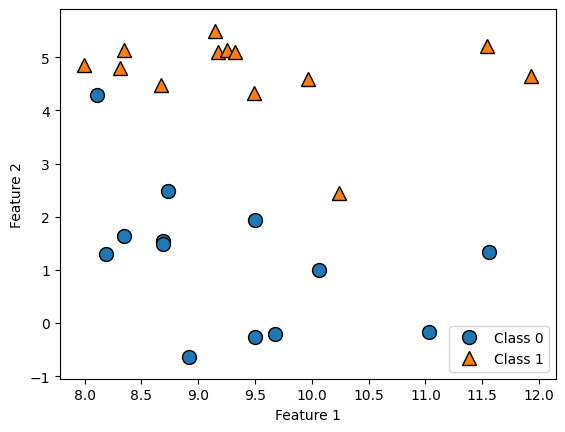

In [2]:
import mglearn as mg
from mglearn.datasets import *
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
X_forge, y_forge = make_forge()
mg.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge)
plt.legend(["Class 0", "Class 1"], loc="best")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
print(f"Shape of X_forge: {X_forge.shape}")



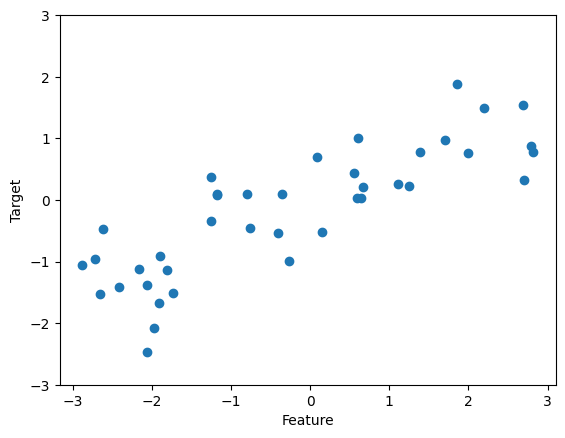

In [3]:
X_wave, y_wave = make_wave(n_samples=40)
plt.plot(X_wave, y_wave, 'o')
plt.ylim(-3, 3)
plt.xlabel('Feature')
plt.ylabel('Target')
plt.show()

In [4]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer(as_frame=True)
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [5]:
cancer["data"].head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
cancer.feature_names


array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

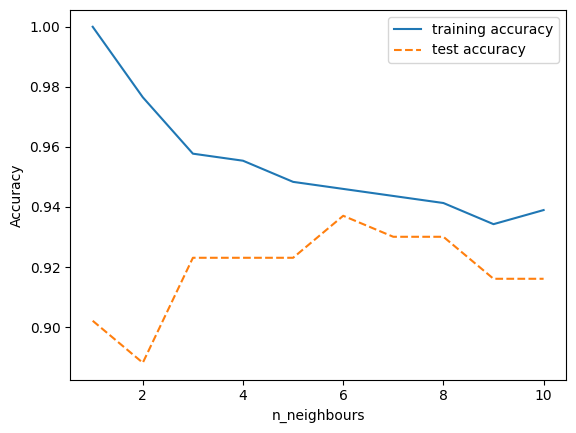

In [7]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=66)

training_accuracy = []
test_accuracy = []
neighbours = range(1, 11)

for n in neighbours:
    knn_model = KNeighborsClassifier(n_neighbors=n).fit(X_train, y_train)
    training_accuracy.append(knn_model.score(X_train, y_train))
    test_accuracy.append(knn_model.score(X_test, y_test))

plt.plot(neighbours, training_accuracy)
plt.plot(neighbours, test_accuracy, "--")
plt.legend(["training accuracy", "test accuracy"])
plt.ylabel("Accuracy")
plt.xlabel("n_neighbours")
plt.show()

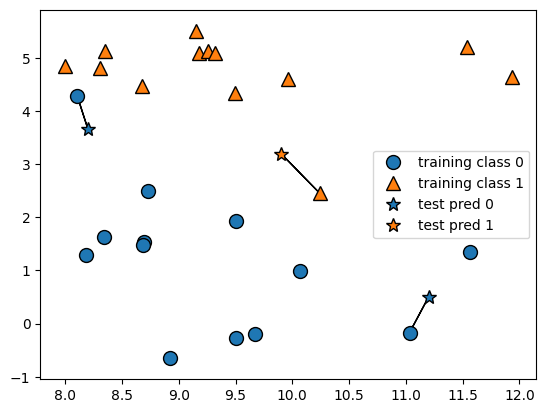

In [9]:
mg.plots.plot_knn_classification(n_neighbors=1)

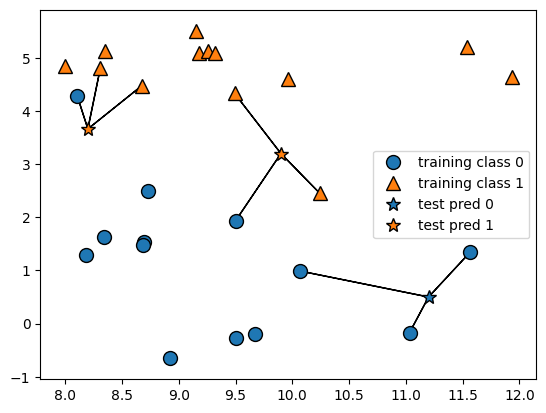

In [8]:
mg.plots.plot_knn_classification(n_neighbors=3)

In [10]:

X_train, X_test, y_train, y_test = train_test_split(X_forge, y_forge,random_state=0)
knn_model = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)

knn_predictions = knn_model.predict(X_test)
knn_predictions, knn_model.score(X_test, y_test)

(array([1, 0, 1, 0, 1, 0, 0]), 0.8571428571428571)

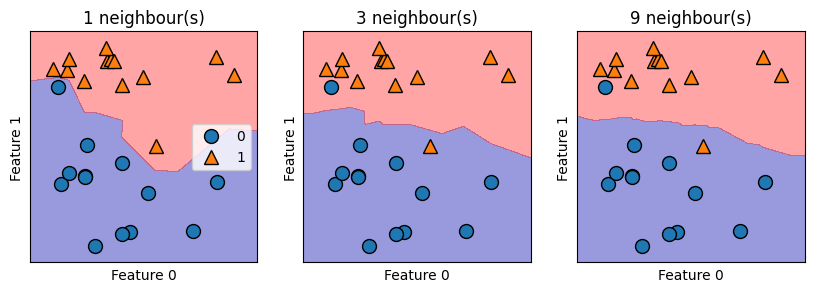

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(10, 3))

for n_neighbours, ax in zip([1, 3, 9], axes):
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbours).fit(X_forge, y_forge)
    mg.plots. plot_2d_separator(knn_model, X_forge, fill=True, eps=.5, ax=ax, alpha=.4 )
    mg.discrete_scatter(X_forge[:, 0], X_forge[:, 1], y_forge, ax=ax)
    ax.set_title(f"{n_neighbours} neighbour(s)")
    ax.set_xlabel("Feature 0")
    ax.set_ylabel("Feature 1")
axes[0].legend(loc="best")

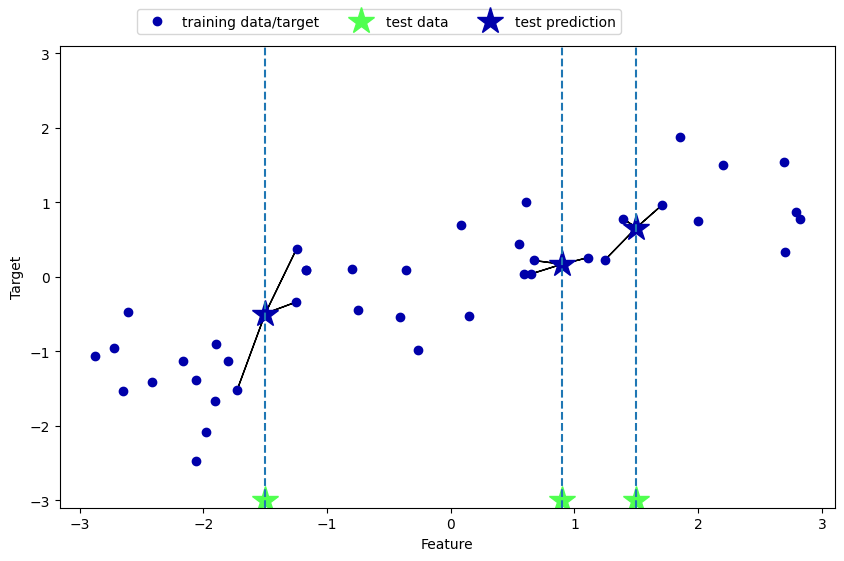

In [12]:
mg.plots.plot_knn_regression(n_neighbors=3)

In [15]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import sklearn.metrics as metrics
import torch.utils.data.dataloader

In [18]:



BATCH_SIZE = 32

# transformations

transform = transforms.Compose([transforms.ToTensor()])

# download and load training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [19]:
# download and load test dataset

testset = torchvision.datasets.MNIST(root='./data', train=False, download=True,transform=transform)
testLoader = torch.utils.data.DataLoader(testset, batch_size=BATCH_SIZE, shuffle=True, num_workers=2)

In [22]:
print(len(trainset))
print(trainset[10])

60000
(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
          0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 

In [23]:
class MyModel(nn.Module):
    def __init__(self):
        super(MyModel, self).__init__()

        # 28x28x1 => 26x26x32
        self.conv1 = nn.Conv2d(in_channels=1, out_channels=2, kernel_size=3)
        self.d1 = nn.Linear(26*26*32, 128)
        self.d2 = nn.Linear(128, 10)

    def forward(self, x):
        # 32x1x28x28 => 32x32x26x26
        x = self.conv1(x)
        x = F.relu(x)

        # flatten => 32x(32*26*26)
        x = x.flatten(start_dim = 1)

        # 32 x (32*26*26) => 32x128
        x = self.d1(x)
        x = F.relu(x)
        
        # logits => 32x10
        logits = self.d2(x)
        out = F.softmax(logits, dim=1)
        return out